![Data Collection](../img/01.png)

# Data Collection and Initial Exploration

## Objective
Load and explore the drug safety dataset from Drugs.com, documenting the dataset structure, columns, and initial descriptive statistics.

## Contents
1. Load the dataset
2. Examine dataset structure and basic information
3. Initial descriptive statistics
4. Data quality assessment
5. Save processed data for next tasks

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")


Libraries imported successfully!
 Pandas version: 2.3.2
 NumPy version: 1.26.4


---
## 1. Loading the Dataset

Let's load our drug safety dataset and examine its basic structure.


In [2]:
# Load the dataset
data_path = Path("../data/drugs_side_effects_drugs_com.csv")

try:
    # Load the CSV file
    df = pd.read_csv(data_path)
    print(f" Dataset loaded successfully!")
    print(f" Dataset shape: {df.shape}")
    print(f" Columns: {len(df.columns)}")
    print(f" Rows: {len(df)}")
    
except FileNotFoundError:
    print(" File not found. Please check the file path.")
except Exception as e:
    print(f" Error loading dataset: {e}")


 Dataset loaded successfully!
 Dataset shape: (2931, 17)
 Columns: 17
 Rows: 2931


---
## 2. Dataset Structure and Basic Information


In [3]:
# Display dataset information
print("DATASET INFORMATION")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n Column Names and Data Types:")
print("-" * 30)

# Display column information
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:<30} | {dtype}")

print(f"\n First 3 rows preview:")
df.head(3)


DATASET INFORMATION
Dataset shape: (2931, 17)
Memory usage: 18.04 MB

 Column Names and Data Types:
------------------------------
 1. drug_name                      | object
 2. medical_condition              | object
 3. side_effects                   | object
 4. generic_name                   | object
 5. drug_classes                   | object
 6. brand_names                    | object
 7. activity                       | object
 8. rx_otc                         | object
 9. pregnancy_category             | object
10. csa                            | object
11. alcohol                        | object
12. related_drugs                  | object
13. medical_condition_description  | object
14. rating                         | float64
15. no_of_reviews                  | float64
16. drug_link                      | object
17. medical_condition_url          | object

 First 3 rows preview:


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alodox, Avidoxy, Doryx, Mondoxyne NL, Monodox, Morgido...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin.html | prednisone: https://www.drugs.com/predniso...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,"hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Call your doctor a...",spironolactone,"Aldosterone receptor antagonists, Potassium-sparing diuretics","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.html | lisinopril: https://www.drugs.com/lisinopril...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual brui...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, Vectrin, Myrac",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin.html | prednisone: https://www.drugs.com/predniso...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html


In [4]:
# Display basic dataset statistics
print("BASIC DATASET STATISTICS")
print("=" * 50)

# Numerical columns statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f" Numerical columns: {list(numerical_cols)}")

if len(numerical_cols) > 0:
    print("\n Numerical Statistics:")
    display(df[numerical_cols].describe())

# Categorical columns information
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n Text/Categorical columns: {len(categorical_cols)}")
print(f"Columns: {list(categorical_cols[:5])}{'...' if len(categorical_cols) > 5 else ''}")

# Show sample values for key columns
key_columns = ['drug_name', 'medical_condition', 'rating', 'no_of_reviews']
print(f"\n Sample values from key columns:")
for col in key_columns:
    if col in df.columns:
        unique_count = df[col].nunique()
        sample_values = df[col].dropna().unique()[:3]
        print(f"{col}: {unique_count} unique values | Sample: {list(sample_values)}")


BASIC DATASET STATISTICS
 Numerical columns: ['rating', 'no_of_reviews']

 Numerical Statistics:


,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000



 Text/Categorical columns: 15
Columns: ['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes']...

 Sample values from key columns:
drug_name: 2912 unique values | Sample: ['doxycycline', 'spironolactone', 'minocycline']
medical_condition: 47 unique values | Sample: ['Acne', 'ADHD', 'AIDS/HIV']
rating: 86 unique values | Sample: [6.8, 7.2, 5.7]
no_of_reviews: 301 unique values | Sample: [760.0, 449.0, 482.0]


---
## 3. Data Quality Assessment


In [5]:
# Data quality assessment
print(" DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print(" Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Duplicate rows check
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")

# Data types assessment
print(f"\n Data Types Distribution:")
print(df.dtypes.value_counts())

# Memory usage by column
print(f"\n Memory Usage by Column (MB):")
memory_usage = df.memory_usage(deep=True) / 1024**2
print(memory_usage.sort_values(ascending=False).head())


 DATA QUALITY ASSESSMENT
 Missing Values Summary:
                    Missing_Count  Missing_Percentage
alcohol                      1554           53.019447
related_drugs                1469           50.119413
no_of_reviews                1345           45.888775
rating                       1345           45.888775
brand_names                  1213           41.385193
pregnancy_category            229            7.813033
side_effects                  124            4.230638
drug_classes                   82            2.797680
generic_name                   43            1.467076
rx_otc                          1            0.034118

 Duplicate rows: 0

 Data Types Distribution:
object     15
float64     2
Name: count, dtype: int64

 Memory Usage by Column (MB):
medical_condition_description    16.389078
side_effects                      3.568823
related_drugs                     0.762949
medical_condition_url             0.275054
drug_link                         0.262814
dtype: fl

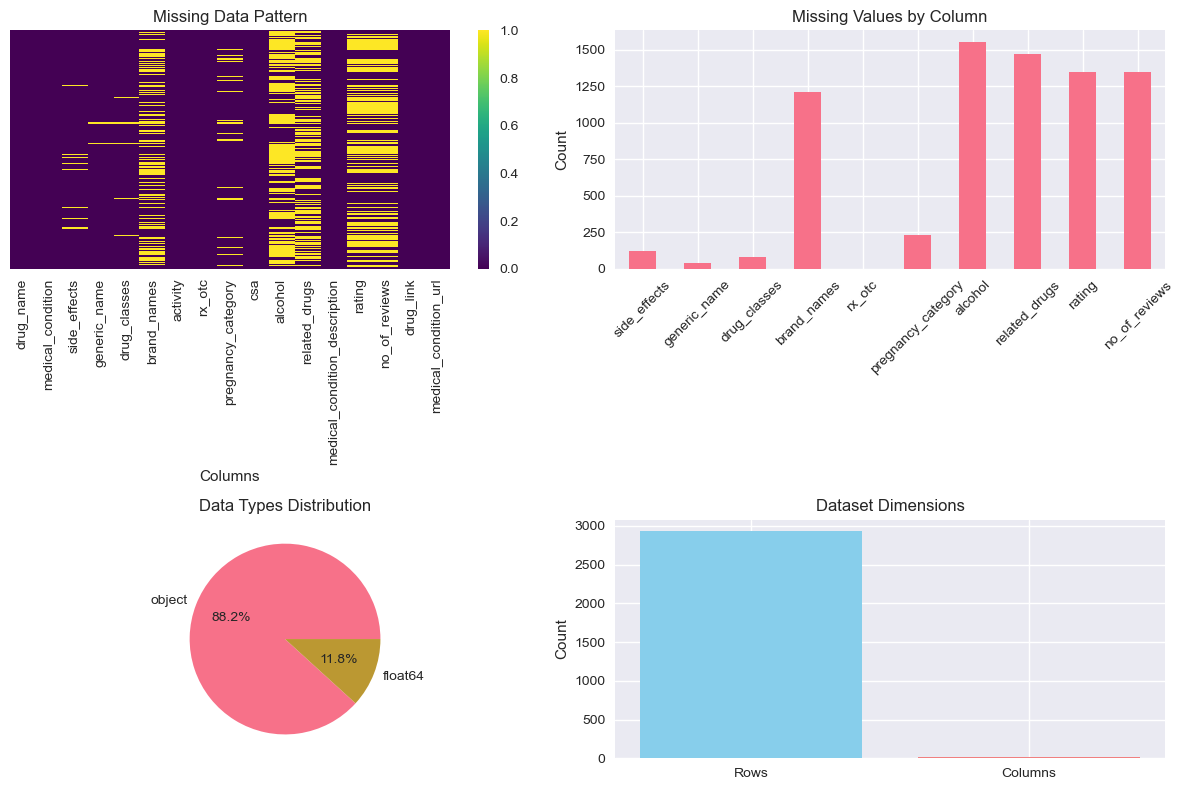

 Visualization complete!


In [6]:
# Visualize missing data
plt.figure(figsize=(12, 8))

# Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Pattern')
plt.xlabel('Columns')

# Missing data bar plot
plt.subplot(2, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if len(missing_counts) > 0:
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    plt.title('Missing Values by Column')

# Data types distribution
plt.subplot(2, 2, 3)
dtype_counts = df.dtypes.value_counts()
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
plt.title('Data Types Distribution')

# Dataset size visualization
plt.subplot(2, 2, 4)
categories = ['Rows', 'Columns']
values = [len(df), len(df.columns)]
plt.bar(categories, values, color=['skyblue', 'lightcoral'])
plt.title('Dataset Dimensions')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f" Visualization complete!")


---
## 4. Initial Descriptive Statistics

Let's examine the key characteristics of our drug dataset.


In [7]:
# Key statistics about the dataset
print(" KEY DATASET STATISTICS")
print("=" * 50)

# Drug-related statistics
if 'drug_name' in df.columns:
    unique_drugs = df['drug_name'].nunique()
    print(f" Unique drugs: {unique_drugs}")

# Medical condition statistics  
if 'medical_condition' in df.columns:
    unique_conditions = df['medical_condition'].nunique()
    print(f" Unique medical conditions: {unique_conditions}")
    
    print(f"\n Top 10 medical conditions:")
    top_conditions = df['medical_condition'].value_counts().head(10)
    for i, (condition, count) in enumerate(top_conditions.items(), 1):
        print(f"{i:2d}. {condition}: {count} drugs")

# Rating statistics
if 'rating' in df.columns:
    avg_rating = df['rating'].mean()
    print(f"\n Average drug rating: {avg_rating:.2f}")
    print(f" Rating range: {df['rating'].min():.1f} - {df['rating'].max():.1f}")
    
    # Rating distribution
    rating_dist = df['rating'].value_counts().sort_index()
    print(f"\n Rating distribution:")
    for rating, count in rating_dist.head(10).items():
        print(f"   {rating}: {count} drugs")

# Review statistics
if 'no_of_reviews' in df.columns:
    total_reviews = df['no_of_reviews'].sum()
    avg_reviews = df['no_of_reviews'].mean()
    print(f"\n Total reviews: {total_reviews:,.0f}")
    print(f" Average reviews per drug: {avg_reviews:.1f}")

# Prescription type analysis
if 'rx_otc' in df.columns:
    rx_distribution = df['rx_otc'].value_counts()
    print(f"\n Prescription type distribution:")
    for rx_type, count in rx_distribution.items():
        print(f"   {rx_type}: {count} ({count/len(df)*100:.1f}%)")


 KEY DATASET STATISTICS
 Unique drugs: 2912
 Unique medical conditions: 47

 Top 10 medical conditions:
 1. Pain: 264 drugs
 2. Colds & Flu: 245 drugs
 3. Acne: 238 drugs
 4. Hypertension: 177 drugs
 5. Osteoarthritis: 129 drugs
 6. Hayfever: 124 drugs
 7. Eczema: 122 drugs
 8. AIDS/HIV: 109 drugs
 9. Diabetes (Type 2): 104 drugs
10. Psoriasis: 93 drugs

 Average drug rating: 6.81
 Rating range: 0.0 - 10.0

 Rating distribution:
   0.0: 26 drugs
   1.0: 44 drugs
   1.1: 1 drugs
   1.5: 1 drugs
   1.7: 1 drugs
   1.8: 2 drugs
   2.0: 17 drugs
   2.1: 1 drugs
   2.3: 1 drugs
   2.4: 1 drugs

 Total reviews: 119,053
 Average reviews per drug: 75.1

 Prescription type distribution:
   Rx: 1998 (68.2%)
   Rx/OTC: 604 (20.6%)
   OTC: 328 (11.2%)


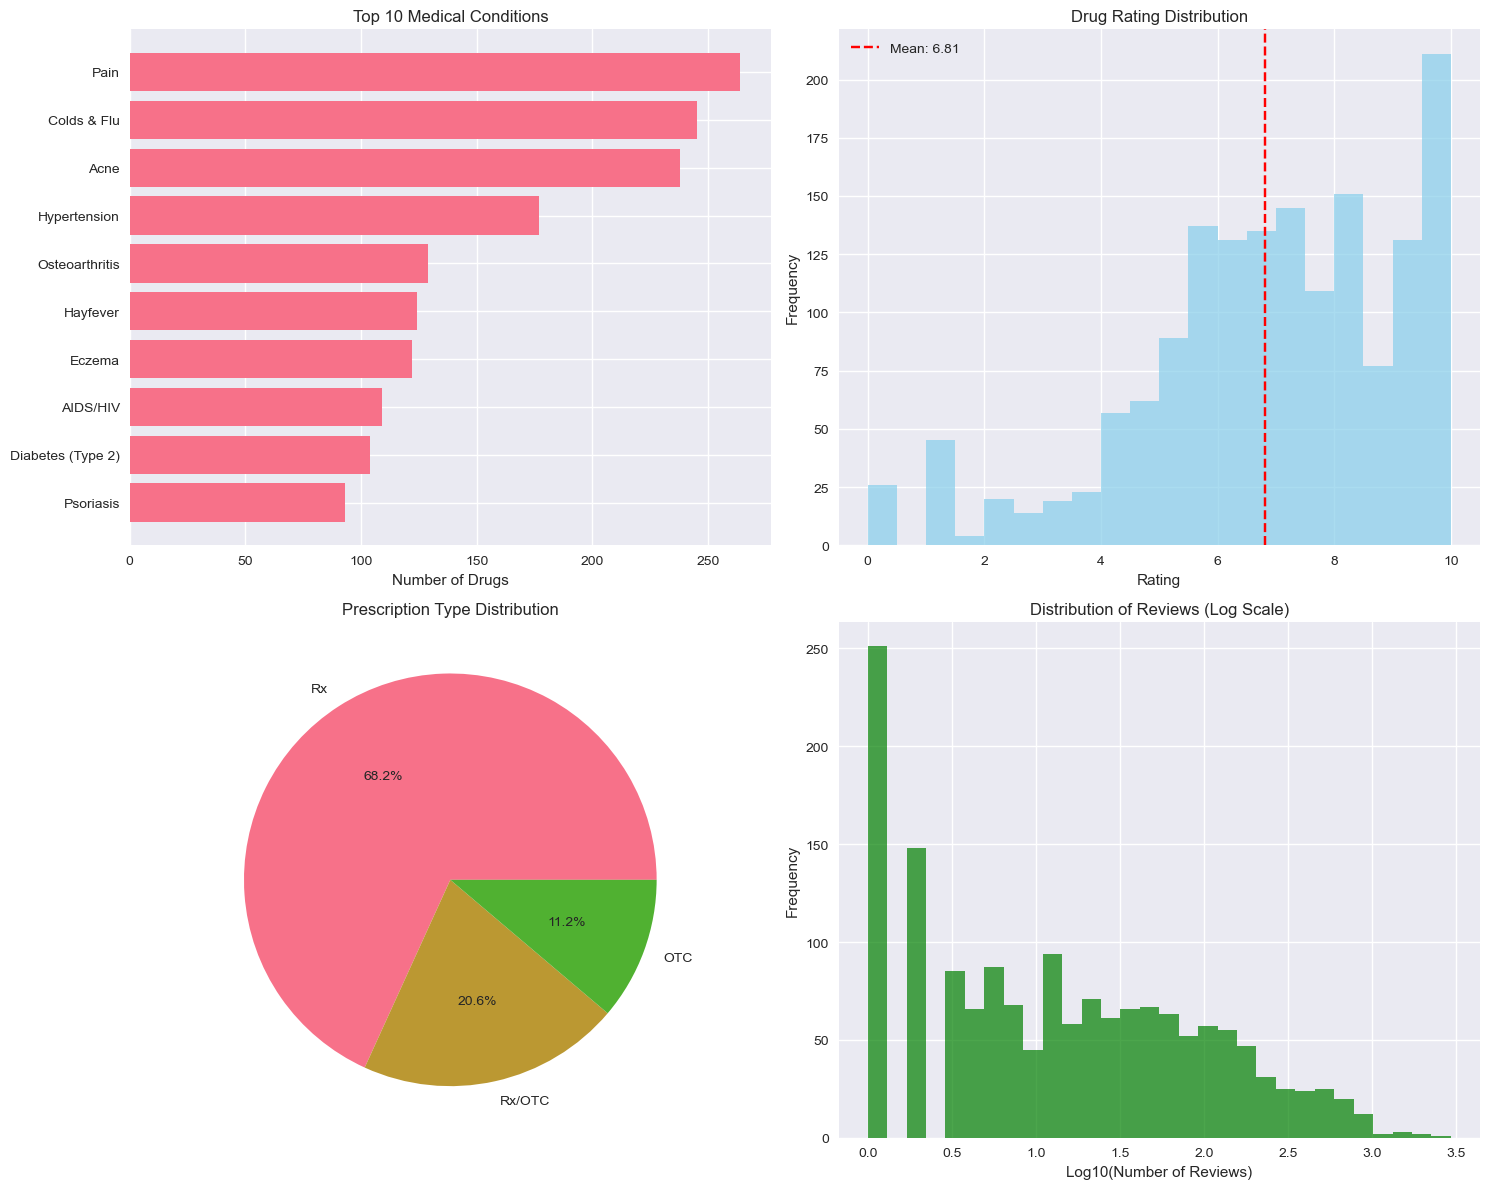

 Statistical visualizations complete!


In [8]:
# Create visualizations for key statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top medical conditions
if 'medical_condition' in df.columns:
    top_conditions = df['medical_condition'].value_counts().head(10)
    axes[0, 0].barh(range(len(top_conditions)), top_conditions.values)
    axes[0, 0].set_yticks(range(len(top_conditions)))
    axes[0, 0].set_yticklabels([f"{cond[:20]}..." if len(cond) > 20 else cond 
                               for cond in top_conditions.index])
    axes[0, 0].set_xlabel('Number of Drugs')
    axes[0, 0].set_title('Top 10 Medical Conditions')
    axes[0, 0].invert_yaxis()

# 2. Rating distribution
if 'rating' in df.columns:
    df['rating'].hist(bins=20, ax=axes[0, 1], alpha=0.7, color='skyblue')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Drug Rating Distribution')
    axes[0, 1].axvline(df['rating'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df["rating"].mean():.2f}')
    axes[0, 1].legend()

# 3. Prescription type distribution
if 'rx_otc' in df.columns:
    rx_counts = df['rx_otc'].value_counts()
    axes[1, 0].pie(rx_counts.values, labels=rx_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Prescription Type Distribution')

# 4. Number of reviews distribution (log scale)
if 'no_of_reviews' in df.columns:
    # Filter out zero reviews for log scale
    reviews_data = df[df['no_of_reviews'] > 0]['no_of_reviews']
    axes[1, 1].hist(np.log10(reviews_data), bins=30, alpha=0.7, color='green')
    axes[1, 1].set_xlabel('Log10(Number of Reviews)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of Reviews (Log Scale)')

plt.tight_layout()
plt.show()

print(" Statistical visualizations complete!")


---
## 5. Data Summary and Preparation for Next Tasks


In [9]:
# Create a comprehensive summary report
print("DATASET SUMMARY REPORT")
print("=" * 60)

summary_stats = {
    'Total Records': len(df),
    'Total Features': len(df.columns),
    'Unique Drugs': df['drug_name'].nunique() if 'drug_name' in df.columns else 'N/A',
    'Unique Conditions': df['medical_condition'].nunique() if 'medical_condition' in df.columns else 'N/A',
    'Average Rating': f"{df['rating'].mean():.2f}" if 'rating' in df.columns else 'N/A',
    'Total Reviews': f"{df['no_of_reviews'].sum():,.0f}" if 'no_of_reviews' in df.columns else 'N/A',
    'Missing Values': df.isnull().sum().sum(),
    'Duplicate Rows': df.duplicated().sum(),
    'Memory Usage (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
}

for key, value in summary_stats.items():
    print(f"{key:20}: {value}")

print(f"\n KEY INSIGHTS:")
print("-" * 30)
insights = [
    f" Dataset contains {len(df):,} drug-condition pairs",
    f" Covers {df['drug_name'].nunique() if 'drug_name' in df.columns else 'Unknown'} unique medications",
    f" Spans {df['medical_condition'].nunique() if 'medical_condition' in df.columns else 'Unknown'} medical conditions",
    f" Average rating: {df['rating'].mean():.2f}/10" if 'rating' in df.columns else "⭐ Rating data available",
    f" Based on {df['no_of_reviews'].sum():,.0f} patient reviews" if 'no_of_reviews' in df.columns else "💬 Review data available",
    f" Data quality: {100 - (df.isnull().sum().sum() / df.size * 100):.1f}% complete"
]

for insight in insights:
    print(f"  {insight}")

print(f"\n DATASET READY FOR ANALYSIS!")
print("Next steps: Business scenario definition and data cleaning")


DATASET SUMMARY REPORT
Total Records       : 2931
Total Features      : 17
Unique Drugs        : 2912
Unique Conditions   : 47
Average Rating      : 6.81
Total Reviews       : 119,053
Missing Values      : 7405
Duplicate Rows      : 0
Memory Usage (MB)   : 22.96

 KEY INSIGHTS:
------------------------------
   Dataset contains 2,931 drug-condition pairs
   Covers 2912 unique medications
   Spans 47 medical conditions
   Average rating: 6.81/10
   Based on 119,053 patient reviews
   Data quality: 85.1% complete

 DATASET READY FOR ANALYSIS!
Next steps: Business scenario definition and data cleaning


In [10]:
# Save the raw dataset info for next notebooks
import pickle

# Create a metadata dictionary for other notebooks
dataset_metadata = {
    'shape': df.shape,
    'columns': list(df.columns),
    'dtypes': dict(df.dtypes),
    'missing_values': dict(df.isnull().sum()),
    'unique_drugs': df['drug_name'].nunique() if 'drug_name' in df.columns else 0,
    'unique_conditions': df['medical_condition'].nunique() if 'medical_condition' in df.columns else 0,
    'date_collected': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

# Save metadata
with open('../data/dataset_metadata.pkl', 'wb') as f:
    pickle.dump(dataset_metadata, f)


---